In [38]:
# import some common python packages
import astropy.io.fits as fits  # handle FITS images
import numpy as np              # numerical processing 
import matplotlib.pyplot as plt # plotting

In [6]:
# Find what directory we are currently working in
!pwd

/work/astro465_notebooks/introduction


In [7]:
# List all files in the current directory
!ls

introduction.ipynb
M82-NGC3034_No-change_20230831_025732730.fits
M82-NGC3034_No-change_20230831_025756572.fits
M82-NGC3034_No-change_20230831_025811.fits
M82-NGC3034_No-change_20230831_025825.fits
M82-NGC3034_No-change_20230831_025908.fits
M82-NGC3034_No-change_20230831_025920.fits
M82-NGC3034_No-change_20230831_030021.fits
M82-NGC3034_No-change_20230831_030131794.fits
M82-NGC3034_No-change_20230831_030137001.fits
M82-NGC3034_No-change_20230831_030141904.fits
M82-NGC3034_No-change_20230831_030151849.fits
M82-NGC3034_No-change_20230831_030216103.fits
M82-NGC3034_No-change_20230831_030220825.fits
M82-NGC3034_No-change_20230831_030237039.fits
M82-NGC3034_No-change_20230831_030243804.fits
M82-NGC3034_No-change_20230831_030301721.fits
saturnlong_i_20230831_032639.fits


# Opening, and inspecting FITS images

first, we define a variable to contain the filename of the image we want to open and inspect

In [11]:
fits_filename = "M82-NGC3034_No-change_20230831_025811.fits"

Generally, FITS images can contain a variety of datasets, each of which comes with some metadata (i.e. data that describes the actual data)
These are refered to as Header-Data-Units (HDUs), and a FITS file thus contains a list of HDUs

In [12]:
hdu_list = fits.open(fits_filename)

To find out what's in the file, we can use the .info() method

In [13]:
hdu_list.info()

Filename: M82-NGC3034_No-change_20230831_025811.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   (1660, 1252)   int16 (rescales to uint16)   


in the present case, the FITS file from our CCD is relative simple, containing only a single HDU

Each HDU can be addressed via either a numerical index (the value in the 'No.' column), or its name (see the 'Name' column). 

For each HDU, the info() method also provides the number of header entries ('Cards' in FITS-speak), and the Dimensions of the data. In our case that is a 2-D image, but data could also be one- (e.g. a spectrum) or three-dimensional (data cube from either radio data or some integral field spectrograph).

Lastly, 'Format' details the type of data, with int (integers) and float (floating point) being the most common. 

## Accessing FITS headers and data

Headers and image data can be accessed via the .header and .data 

In [63]:
header = hdu_list[0].header
print(repr(header))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1660 / length of data axis 1                          
NAXIS2  =                 1252 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
XBINNING=                    2 / Binning factor X                               
YBINNING=                    2 / Binning factor Y                               
XPIXSZ  =                 10.8 / [um] Pixel Size X, binned                      
YPIXSZ  =                 10.8 / [um] Pixel Size Y, binned                      
EXPTIME =                   

You can also access individual values, but make sure the keyword exists, otherwise python complains (also note, keywords are NOT case-sensitive unlike most other scenarios in python. But it's still good form to capitalize all keyword names anyway) 

In [22]:
print(header['RA'])
print(header['ra'])

359.3930648
359.3930648


You can also access the comment associated with each header

In [27]:
print(header.comments['OBJECT'])

Observed object name


# Important FITS headers

Many FITS files include a long list of header keywords, some more important than others. The CCD camera used in Astro-465 comes with a relatively small set of header keywords, with these being some of the most relevant and commonly used ones:

* `NAXIS` -- how many dimensions is the data (2 being the most common)
* `NAXIS1`, `NAXIS2` -- width and height of image (for 3-D data there's also a `NAXIS3`)
* `IMAGETYP` -- what type of image is this; available options are 'LIGHT', 'DARK', 'FLAT', 'BIAS'
* `FILTER` -- what filter was in the beam during the integration
* `OBJECT` -- a user-defined name for the target
* `EXPTIME` -- commanded exposure time
* `RA` and `DEC` -- position of the telescope
* `XBINNING` and `YBINNING` -- binning used during read-out
* `OBSERVER` -- who took this data; this may come in handy in case you have questions regarding observing conditions etc.

Note that some FITS headers are required (e.g. `NAXIS`), and others are near universal and can be found in data from virtually any instrument (`OBJECT`, `EXPTIME`), many of the other headers are specific to each instrument (e.g. there may be more headers or headers with other names).

# Accessing image data

The actual data (if available; not all FITS extensions need to come with data, and some extensions are header only; one common example is the PrimaryHDU in a multi-extension FITS image) can be accessed via the .data keyword 

In [33]:
data = hdu_list['PRIMARY'].data
print(data.shape)

(1252, 1660)


Note how data.shape reports the image dimensions differently than the .info() method above? 

info() gives image dimensions in x,y (width and height), whereas data.shape presents them in python notation, i.e. y,x. 
This becomes VERY important when actually accessing individual pixels. Furthermore, python starts counting pixels at 0, whereas 
FITS starts counting at 1. Therefore, the bottom left pixel in a FITS image has coordinate (1,1), but to access this pixel
in python you need to use data[0,0].

In [34]:
# Get value for x=18, y=28 (in FITS coordinates) 
x = 17
y = 27
print(data[y,x])

1602


we can also extract parts of an image using slicing just like in numpy

In [35]:
row28 = data[27, :]
print(row28.shape)

(1660,)


In [36]:
column17 = data[:, 16]
print(column17.shape)

(1252,)


In [37]:
cutout_near_center = data[600:650, 810:870]
print(cutout_near_center.shape)

(50, 60)


# Visualizing data

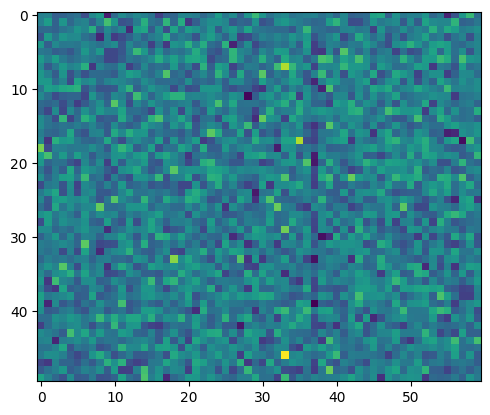

In [56]:
fig, ax = plt.subplots()
ax.imshow(cutout_near_center)

Note how by default x increases from left to right, but y increases downwards, 
opposite to what we are used to in FITS. To fix this, we can tell matplotlib to 
flip the image vertically and count x upwards (`origin='lower'`). 

Furthermore, since we are working with a small cutout of the full frame, we should
account for that when plotting the data as well, using the `extent` parameter. 
Syntax there is `extent=[left_x, right_x, bottom_y, top_y]`.

Lastly, let's add some labels.

Text(0.5, 1.0, 'My first cutout')

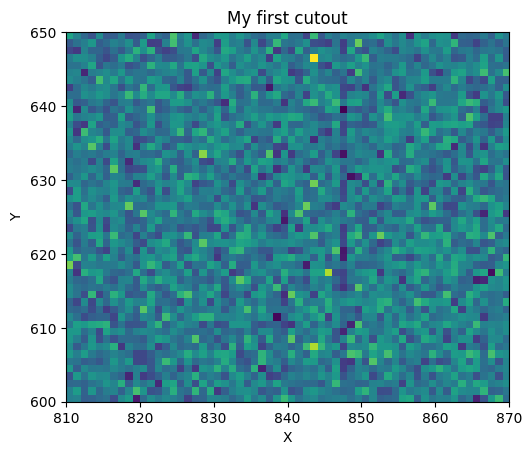

In [62]:
fig, ax = plt.subplots()
ax.imshow(cutout_near_center, origin='lower', extent=[810,870, 600,650])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("My first cutout")

(array([  5.,   9.,  28.,  63., 154., 245., 342., 473., 494., 415., 349.,
        212., 125.,  48.,  27.,   7.,   1.,   2.,   0.,   1.]),
 array([1541. , 1549.7, 1558.4, 1567.1, 1575.8, 1584.5, 1593.2, 1601.9,
        1610.6, 1619.3, 1628. , 1636.7, 1645.4, 1654.1, 1662.8, 1671.5,
        1680.2, 1688.9, 1697.6, 1706.3, 1715. ]),
 <BarContainer object of 20 artists>)

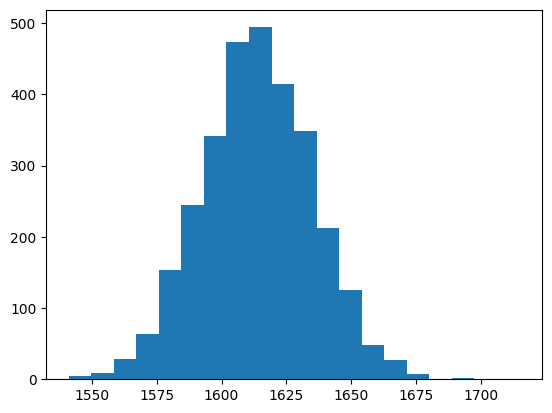

In [46]:
fig, ax = plt.subplots()
ax.hist(cutout_near_center.ravel(), bins=20)

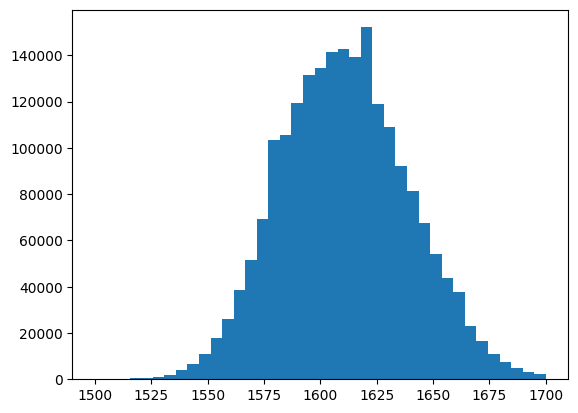

In [52]:
fig, ax = plt.subplots()
ret = ax.hist(data.ravel(), bins=np.linspace(1500,1700,40))

In [55]:
print(ret)
bins,hist,_ = ret

(array([   321.,    303.,    306.,    440.,    640.,   1172.,   1934.,
         4200.,   6674.,  10912.,  18008.,  26228.,  38730.,  51667.,
        69493., 103257., 105592., 119526., 131592., 134458., 141581.,
       142950., 139207., 152147., 119053., 108981.,  92000.,  81504.,
        67660.,  54292.,  43867.,  37733.,  22889.,  16691.,  10929.,
         7682.,   4782.,   3156.,   2108.]), array([1500.        , 1505.12820513, 1510.25641026, 1515.38461538,
       1520.51282051, 1525.64102564, 1530.76923077, 1535.8974359 ,
       1541.02564103, 1546.15384615, 1551.28205128, 1556.41025641,
       1561.53846154, 1566.66666667, 1571.79487179, 1576.92307692,
       1582.05128205, 1587.17948718, 1592.30769231, 1597.43589744,
       1602.56410256, 1607.69230769, 1612.82051282, 1617.94871795,
       1623.07692308, 1628.20512821, 1633.33333333, 1638.46153846,
       1643.58974359, 1648.71794872, 1653.84615385, 1658.97435897,
       1664.1025641 , 1669.23076923, 1674.35897436, 1679.48717949,
 